## Assignment:

Beat the performance of my Lasso regression by **using different feature engineering steps ONLY!!**.

The performance of my current model, as shown in this notebook is:

- test mse: 1063016789.3316755
- test rmse: 32603.938248801718
- test r2: 0.8453144708738004

To beat my model you will need a test r2 bigger than 0.85 and a rmse smaller than 32603.


=====================================================================================================


### Conditions:

- You MUST NOT change the hyperparameters of the Lasso.
- You MUST use the same seeds in Lasso and train_test_split as I show in this notebook (random_state)
- You MUST use all the features of the dataset (except Id) - you MUST NOT select features


=====================================================================================================


### If you beat my model:

Make a pull request with your notebook to this github repo:
https://github.com/solegalli/udemy-feml-challenge

And add your notebook to the folder:

-StudentsSolutions_v1.0.0

### How to make the PR

1) fork the repo:

Go to https://github.com/solegalli/udemy-feml-challenge, and click on the **fork** button at the top-right

2) clone your forked repo into your local computer:

- Go to www.github.com/yourusername/udemy-feml-challenge
- Click the green button that says clone or download
- copy the url that opens up
- power up a git console
- type: git clone (paste the url you copied from github)
- done

3) Make a copy of the jupyter notebook and add your name:

- Open up the Jupyter notebook called 13-Assignement.ipynb
- Click the "File" button at the top-right and then click "Make a copy"
- **Work your solution in the Copy** and not in the original assignment (otherwise there will be conflicts when making the PR)
- Change the name of the copy of the notebook to: 13-Assignement_yourname.ipynb
- Move the notebook to the folder **StudentsSolutions_v1.0.0**
- done

When you finish, just commit the new notebook to your fork and then make a PR to my repo.

- git add StudentsSolutions_v1.0.0/13-Assignement_yourname.ipynb
- git commit -m "your commit message"
- git push origin master or git push origin yourfeaturebranch
- go to your repo and make a pull request.


## But i have a notebook ready and I haven't cloned the repo yet, how can I make the PR?

If you worked in the copy you downloaded from Udemy before forking and cloning this repo, then follow this steps:

1) fork the repo:

Go to https://github.com/solegalli/udemy-feml-challenge, and click on the fork button at the top-right

2) clone your forked repo into your local computer:

Go to www.github.com/yourusername/udemy-feml-challenge

- Click the green button that says clone or download
- Copy the url that opens up
- Power up a git console
- Type: git clone (paste the url you copied from github)
- Done

3) Rename your solution as follows and copy it into your cloned repo:

- Rename your solution notebook to: 13-Assignement_yourname.ipynb
- Copy this file into the cloned repo, inside the folder **StudentsSolutions_v1.0.0**
- Done

When you finish, just commit the new notebook to your fork and then make a PR to my repo

- git add StudentsSolutions_v1.0.0/13-Assignement_yourname.ipynb
- git commit -m "your commit message"
- git push origin master or git push origin yourfeaturebranch
- go to your repo and make a pull request.

**Good luck!!**

## House Prices dataset

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
# for the model
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# for feature engineering
from sklearn.preprocessing import StandardScaler
from feature_engine import imputation as mdi
from feature_engine import discretisation as dsc
from feature_engine import encoding as ce

### Load Datasets

In [2]:
# load dataset

data = pd.read_csv('houseprice.csv')

In [3]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [5]:
# make lists of variable types

categorical = [var for var in data.columns if data[var].dtype == 'O']

year_vars = [var for var in data.columns if 'Yr' in var or 'Year' in var]

discrete = [
    var for var in data.columns if data[var].dtype != 'O'
    and len(data[var].unique()) < 20 and var not in year_vars
]

numerical = [
    var for var in data.columns if data[var].dtype != 'O'
    if var not in discrete and var not in ['Id', 'SalePrice']
    and var not in year_vars
]

print('There are {} continuous variables'.format(len(numerical)))
print('There are {} discrete variables'.format(len(discrete)))
print('There are {} temporal variables'.format(len(year_vars)))
print('There are {} categorical variables'.format(len(categorical)))

There are 18 continuous variables
There are 14 discrete variables
There are 4 temporal variables
There are 43 categorical variables


### Separate train and test set

In [6]:
# IMPORTANT: keep the random_state to zero for reproducibility
# Let's separate into train and test set

X_train, X_test, y_train, y_test = train_test_split(data.drop(
    ['Id', 'SalePrice'], axis=1),
    data['SalePrice'],
    test_size=0.1,
    random_state=0)

In [7]:
# calculate elapsed time

def elapsed_years(df, var):
    # capture difference between year variable and
    # year the house was sold
    
    df[var] = df['YrSold'] - df[var]
    return df

for var in ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']:
    X_train = elapsed_years(X_train, var)
    X_test = elapsed_years(X_test, var)

In [8]:
# drop YrSold
X_train.drop('YrSold', axis=1, inplace=True)
X_test.drop('YrSold', axis=1, inplace=True)

In [9]:
temporal = ['YearBuilt', 'YearRemodAdd', 'GarageYrBlt']

In [10]:
# capture the column names for use later in the notebook
final_columns = X_train.columns

## Missing Values Analysis

In [11]:
X_train[numerical].isnull().mean()

LotFrontage      0.177321
LotArea          0.000000
MasVnrArea       0.004566
BsmtFinSF1       0.000000
BsmtFinSF2       0.000000
BsmtUnfSF        0.000000
TotalBsmtSF      0.000000
1stFlrSF         0.000000
2ndFlrSF         0.000000
LowQualFinSF     0.000000
GrLivArea        0.000000
GarageArea       0.000000
WoodDeckSF       0.000000
OpenPorchSF      0.000000
EnclosedPorch    0.000000
3SsnPorch        0.000000
ScreenPorch      0.000000
MiscVal          0.000000
dtype: float64

In [12]:
X_train[discrete].isnull().mean()

MSSubClass      0.0
OverallQual     0.0
OverallCond     0.0
BsmtFullBath    0.0
BsmtHalfBath    0.0
FullBath        0.0
HalfBath        0.0
BedroomAbvGr    0.0
KitchenAbvGr    0.0
TotRmsAbvGrd    0.0
Fireplaces      0.0
GarageCars      0.0
PoolArea        0.0
MoSold          0.0
dtype: float64

In [13]:
X_train[categorical].isnull().mean()

MSZoning         0.000000
Street           0.000000
Alley            0.938356
LotShape         0.000000
LandContour      0.000000
Utilities        0.000000
LotConfig        0.000000
LandSlope        0.000000
Neighborhood     0.000000
Condition1       0.000000
Condition2       0.000000
BldgType         0.000000
HouseStyle       0.000000
RoofStyle        0.000000
RoofMatl         0.000000
Exterior1st      0.000000
Exterior2nd      0.000000
MasVnrType       0.004566
ExterQual        0.000000
ExterCond        0.000000
Foundation       0.000000
BsmtQual         0.024353
BsmtCond         0.024353
BsmtExposure     0.025114
BsmtFinType1     0.024353
BsmtFinType2     0.025114
Heating          0.000000
HeatingQC        0.000000
CentralAir       0.000000
Electrical       0.000761
KitchenQual      0.000000
Functional       0.000000
FireplaceQu      0.472603
GarageType       0.056317
GarageFinish     0.056317
GarageQual       0.056317
GarageCond       0.056317
PavedDrive       0.000000
PoolQC      

In [14]:
X_train[temporal].isnull().mean()

YearBuilt       0.000000
YearRemodAdd    0.000000
GarageYrBlt     0.056317
dtype: float64

## Outlier Analysis

In [15]:
def diagnostic_plots(df, variable):
    # function takes a dataframe (df) and
    # the variable of interest as arguments

    # define figure size
    plt.figure(figsize=(16, 4))

    # histogram
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30)
    plt.title('Histogram')

    # Q-Q plot
    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)
    plt.ylabel('Variable quantiles')

    # boxplot
    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.show()

variable: LotFrontage


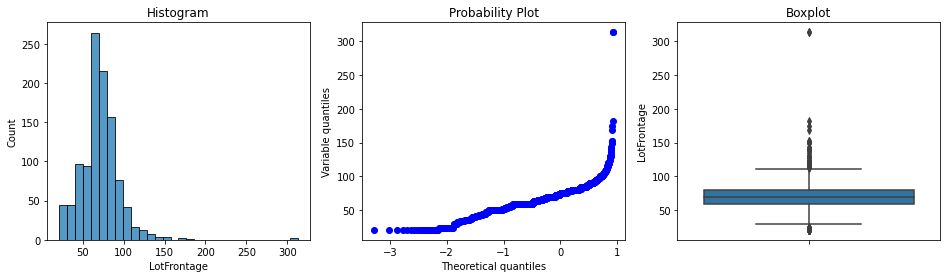

variable: LotArea


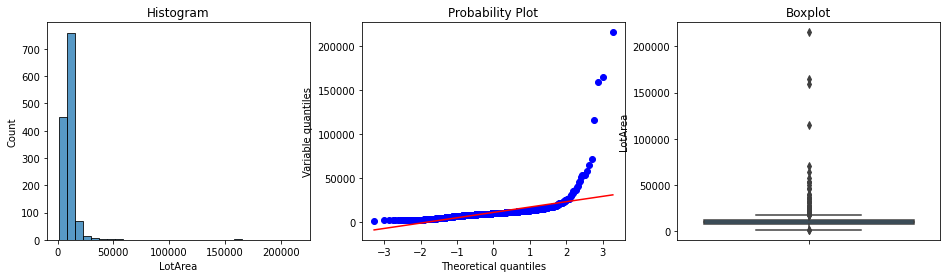

variable: MasVnrArea


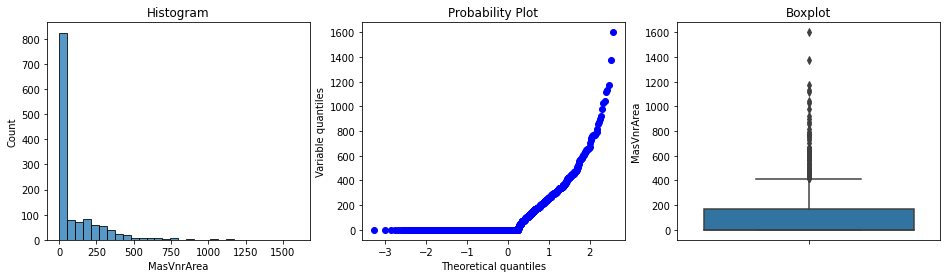

variable: BsmtFinSF1


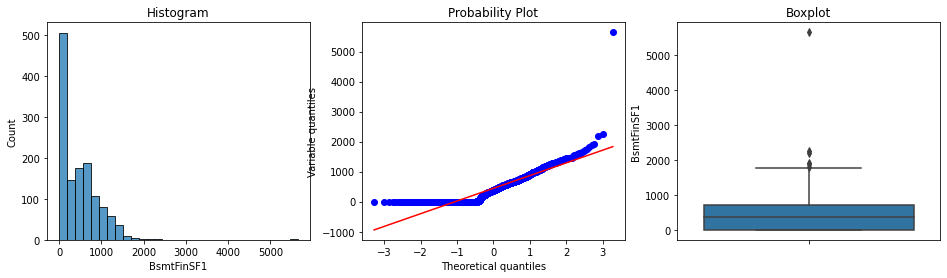

variable: BsmtFinSF2


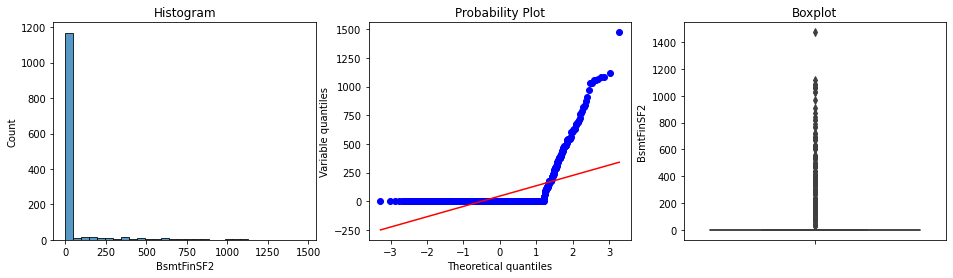

variable: BsmtUnfSF


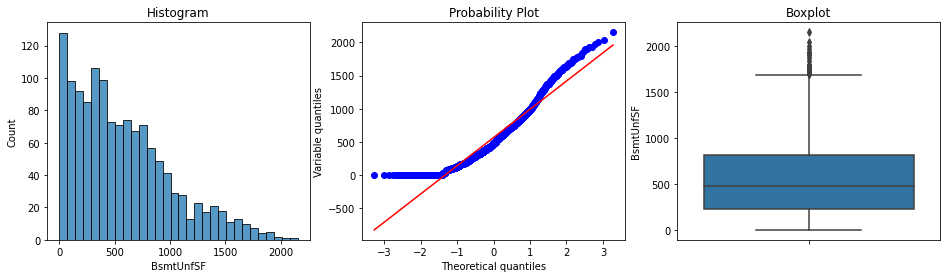

variable: TotalBsmtSF


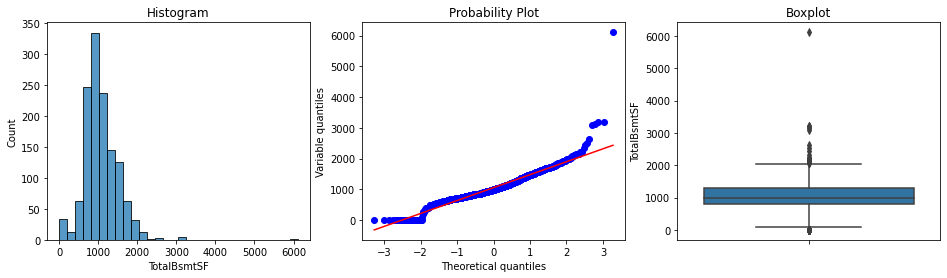

variable: 1stFlrSF


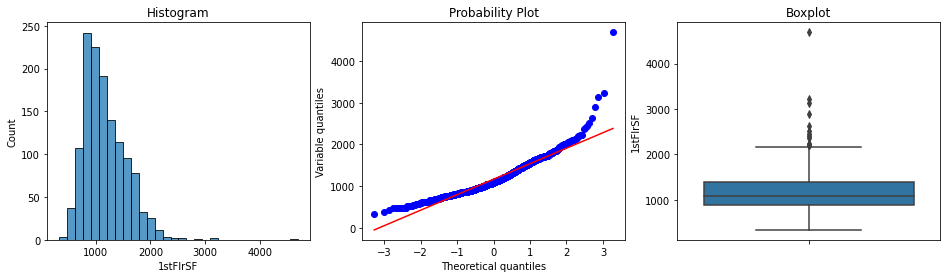

variable: 2ndFlrSF


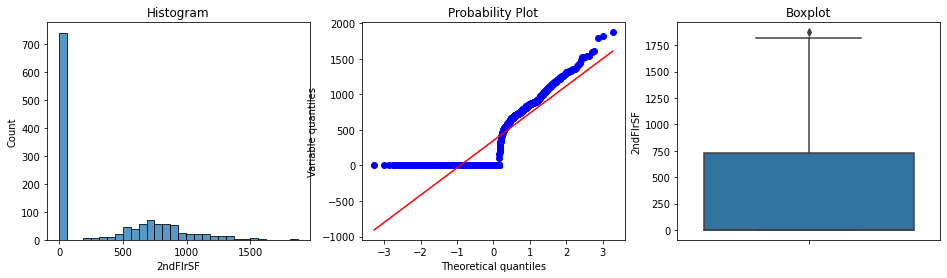

variable: LowQualFinSF


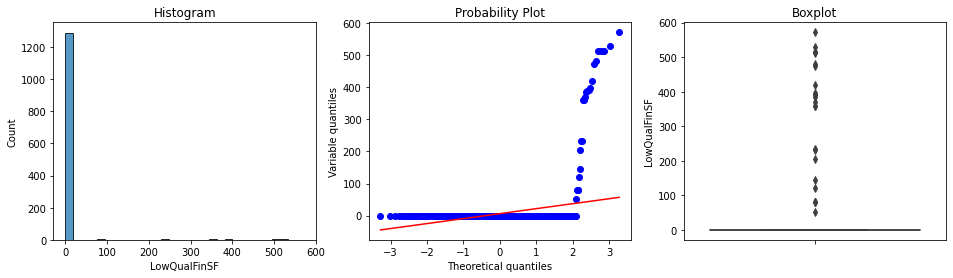

variable: GrLivArea


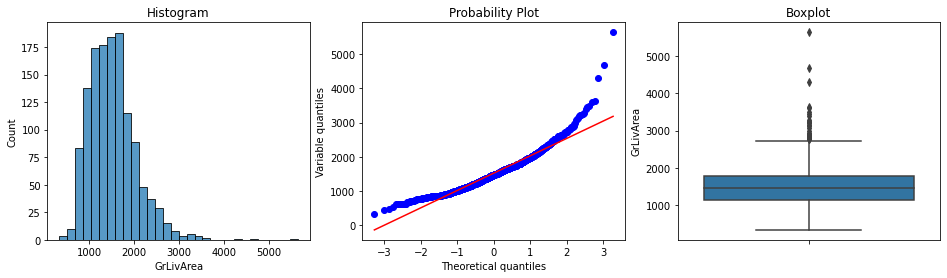

variable: GarageArea


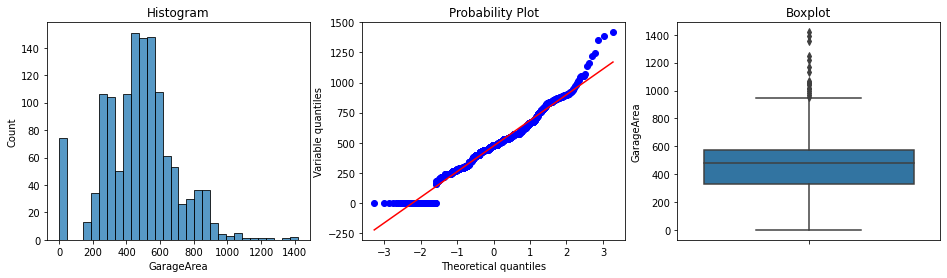

variable: WoodDeckSF


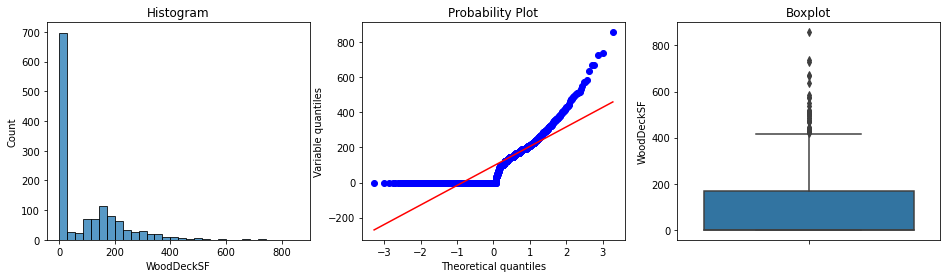

variable: OpenPorchSF


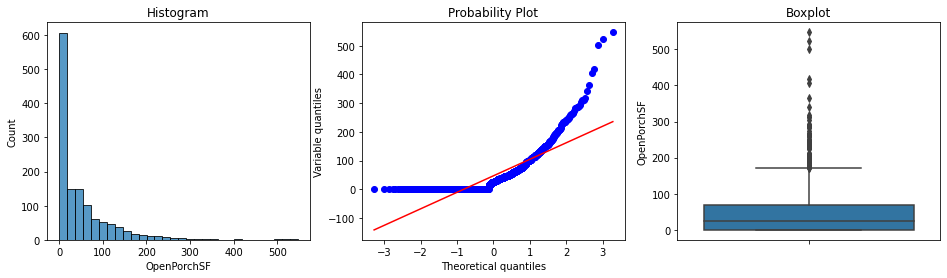

variable: EnclosedPorch


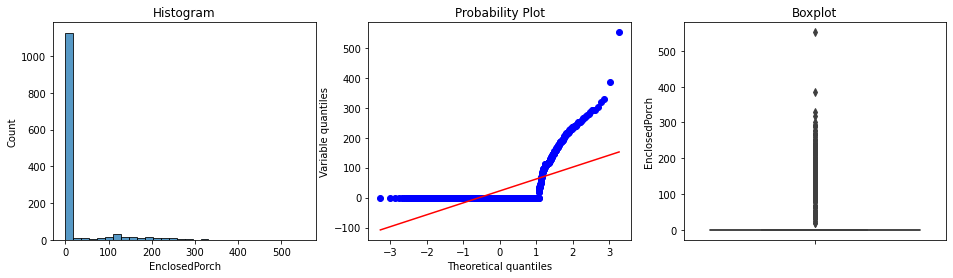

variable: 3SsnPorch


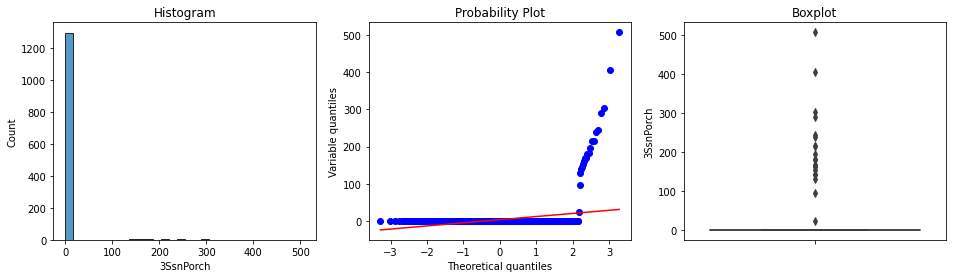

variable: ScreenPorch


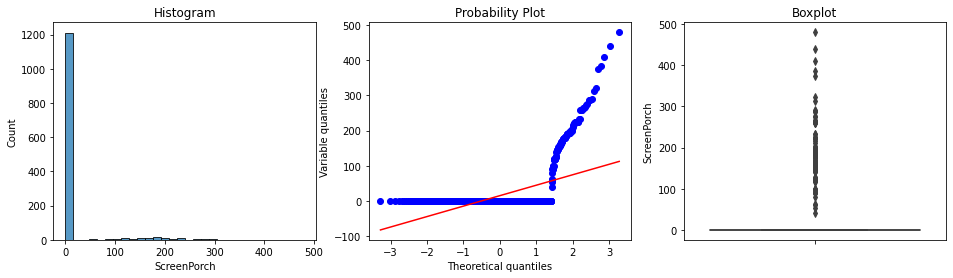

variable: MiscVal


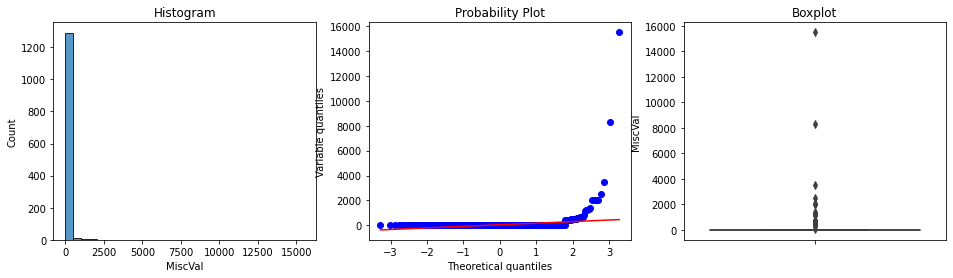

In [16]:
for var in numerical:
    print('variable:', var)
    diagnostic_plots(X_train, var)

Presence of outliers in almost all numerical variables

variable: YearBuilt


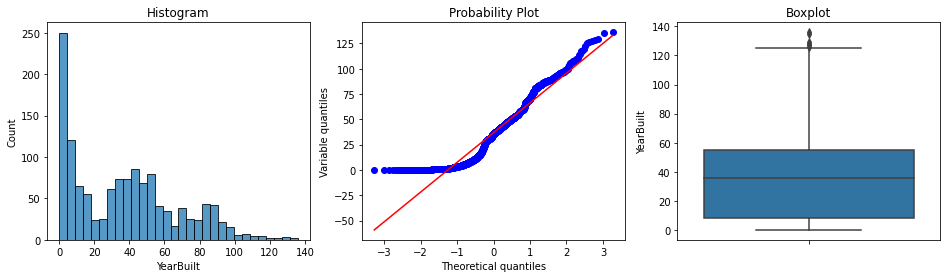

variable: YearRemodAdd


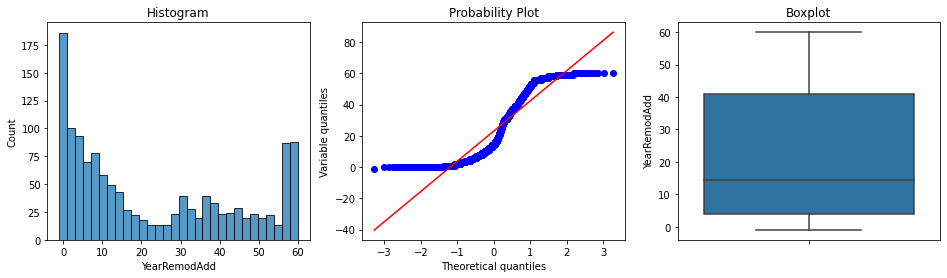

variable: GarageYrBlt


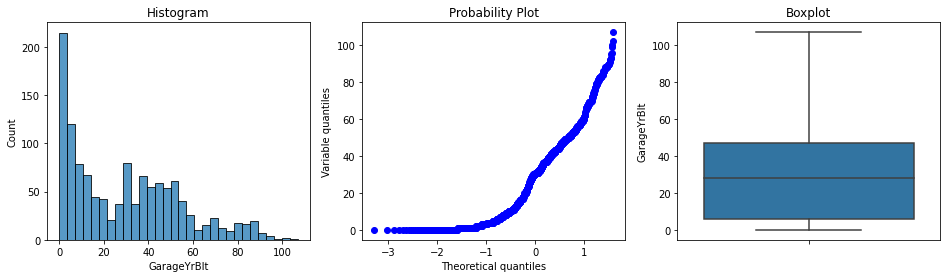

In [17]:
for var in temporal:
    print('variable:', var)
    diagnostic_plots(X_train, var)

Though outliers are not present in temporal variables, these variables are all skewed.

## Rare Label Analysis

Variable: MSZoning


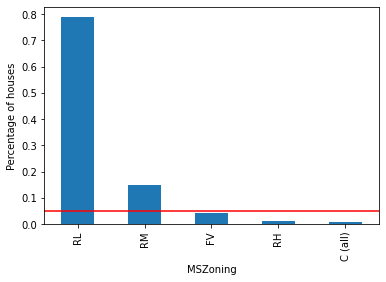

Variable: Street


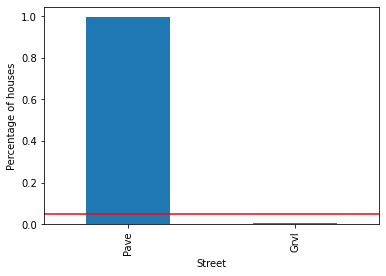

Variable: Alley


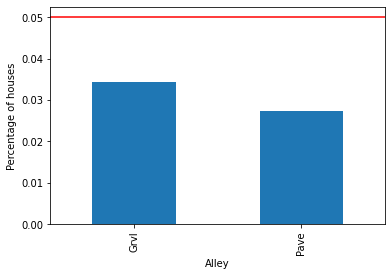

Variable: LotShape


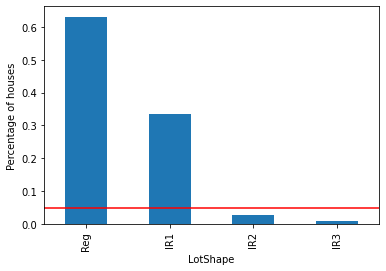

Variable: LandContour


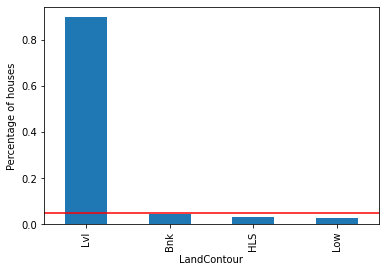

Variable: Utilities


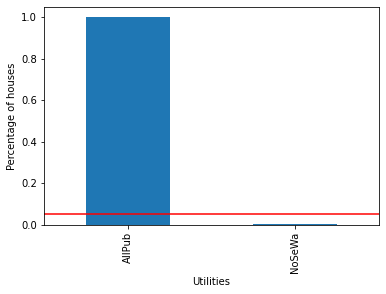

Variable: LotConfig


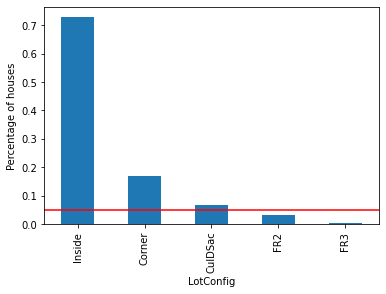

Variable: LandSlope


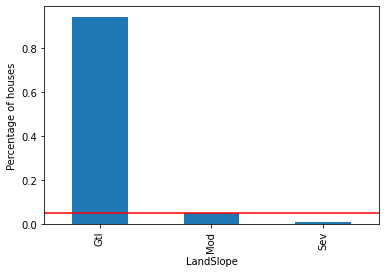

Variable: Neighborhood


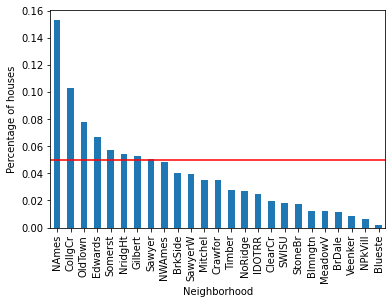

Variable: Condition1


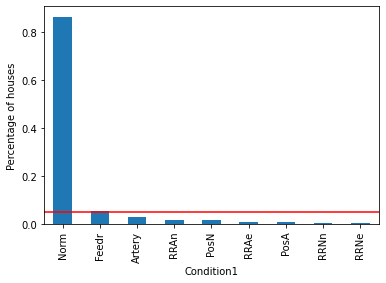

Variable: Condition2


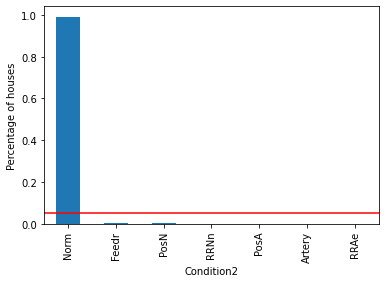

Variable: BldgType


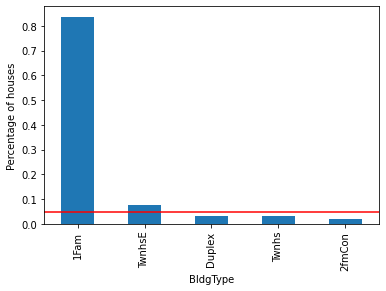

Variable: HouseStyle


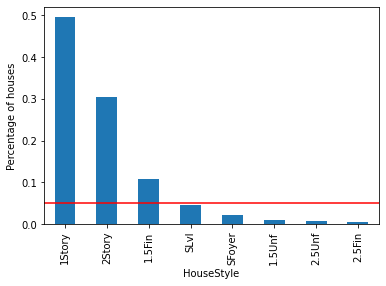

Variable: RoofStyle


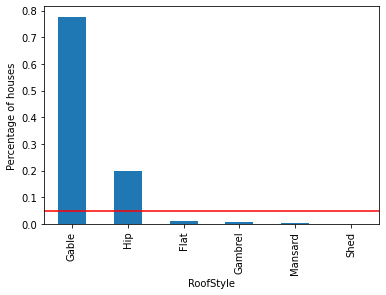

Variable: RoofMatl


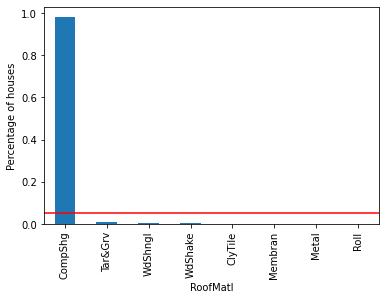

Variable: Exterior1st


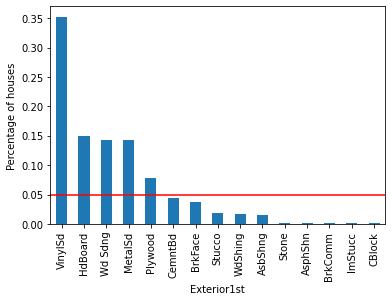

Variable: Exterior2nd


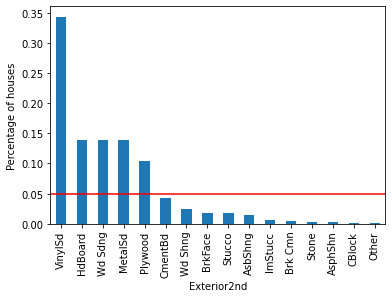

Variable: MasVnrType


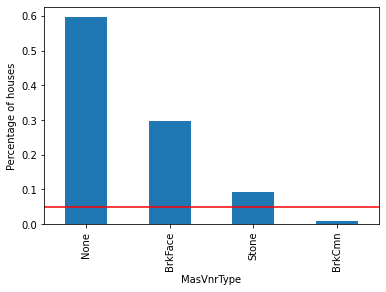

Variable: ExterQual


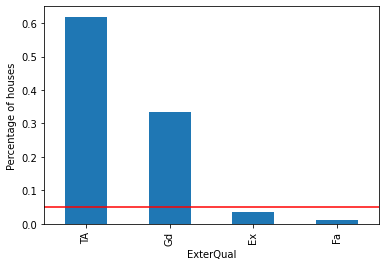

Variable: ExterCond


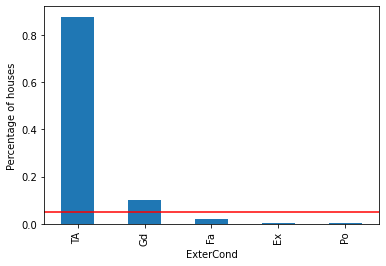

Variable: Foundation


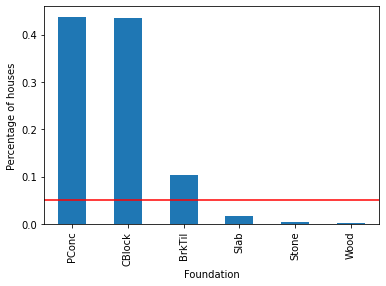

Variable: BsmtQual


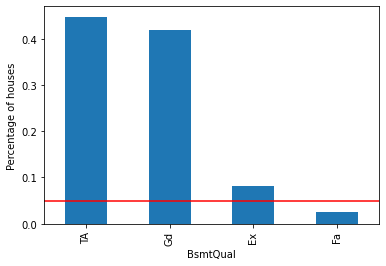

Variable: BsmtCond


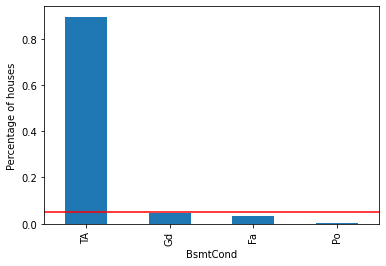

Variable: BsmtExposure


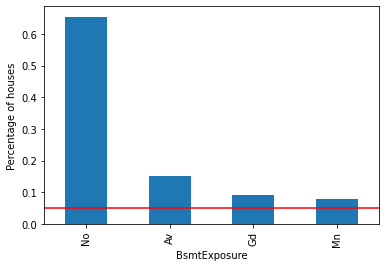

Variable: BsmtFinType1


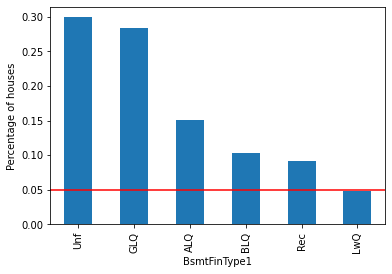

Variable: BsmtFinType2


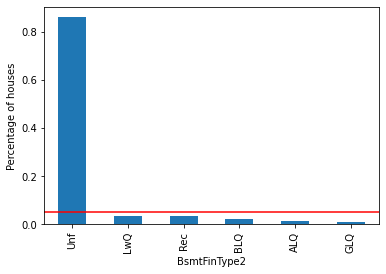

Variable: Heating


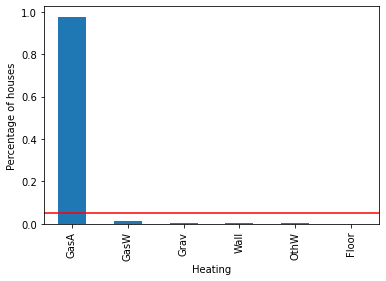

Variable: HeatingQC


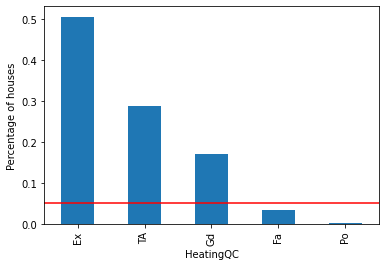

Variable: CentralAir


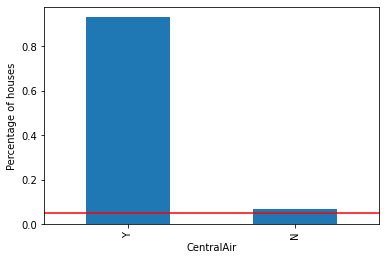

Variable: Electrical


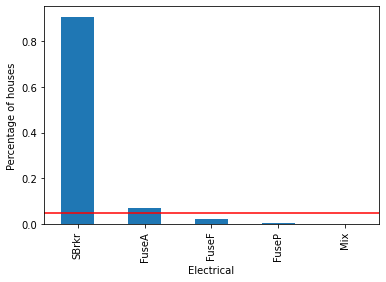

Variable: KitchenQual


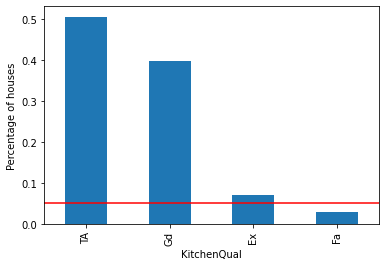

Variable: Functional


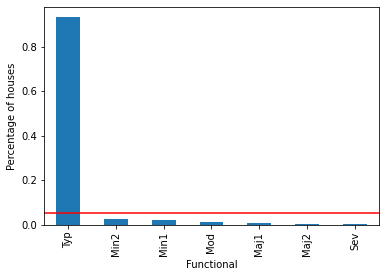

Variable: FireplaceQu


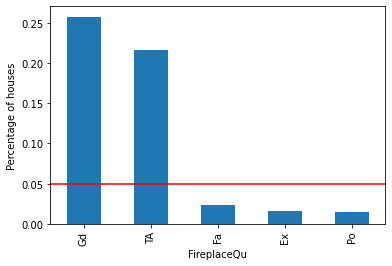

Variable: GarageType


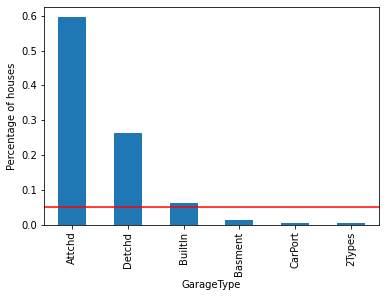

Variable: GarageFinish


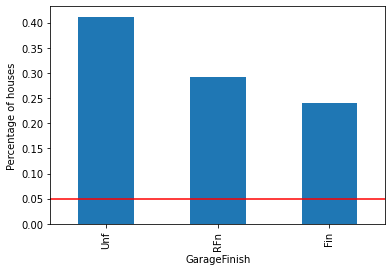

Variable: GarageQual


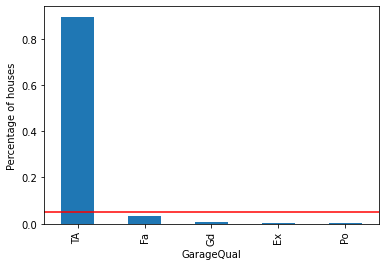

Variable: GarageCond


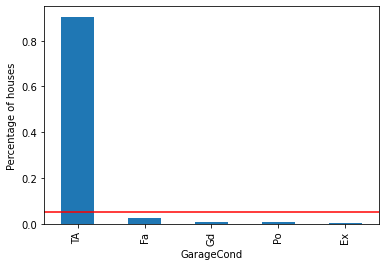

Variable: PavedDrive


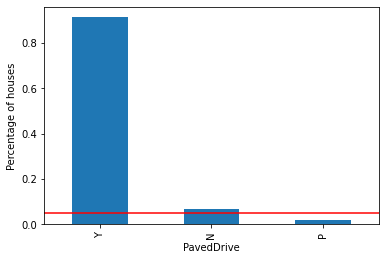

Variable: PoolQC


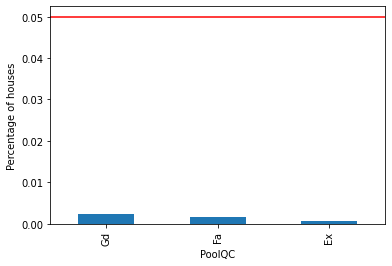

Variable: Fence


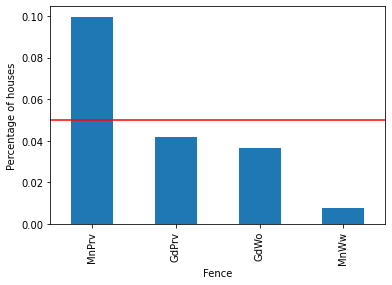

Variable: MiscFeature


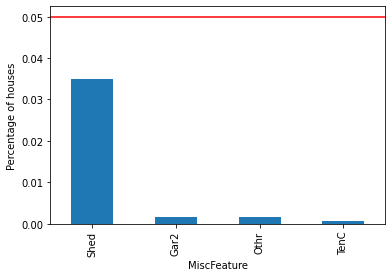

Variable: SaleType


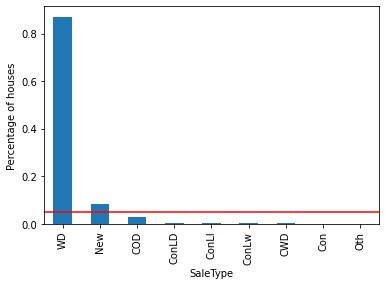

Variable: SaleCondition


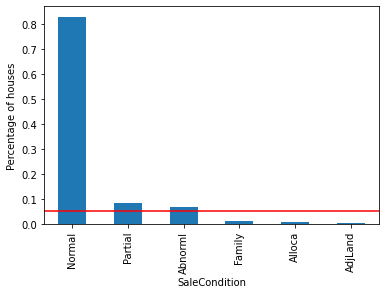

Variable: MSSubClass


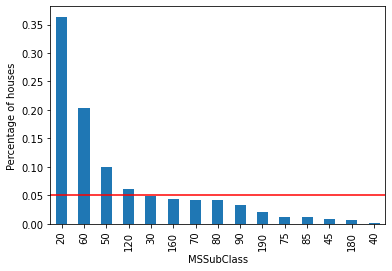

Variable: OverallQual


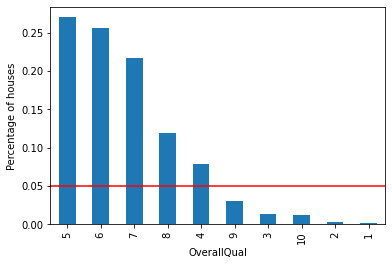

Variable: OverallCond


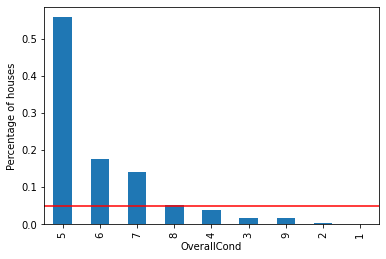

Variable: BsmtFullBath


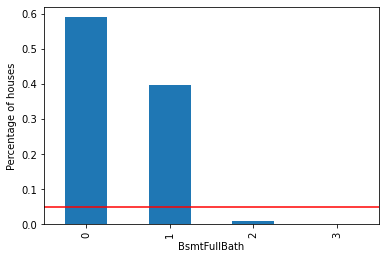

Variable: BsmtHalfBath


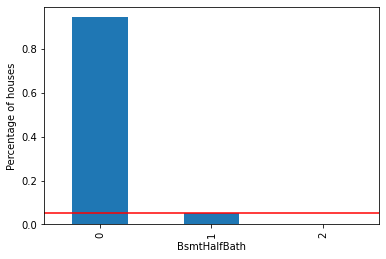

Variable: FullBath


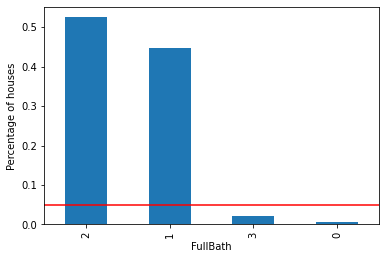

Variable: HalfBath


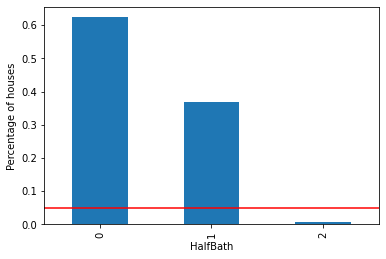

Variable: BedroomAbvGr


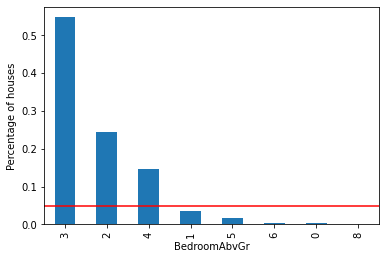

Variable: KitchenAbvGr


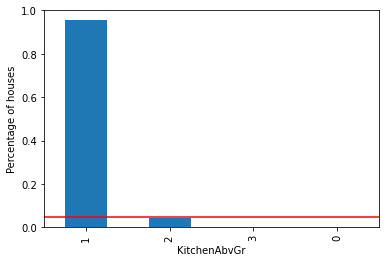

Variable: TotRmsAbvGrd


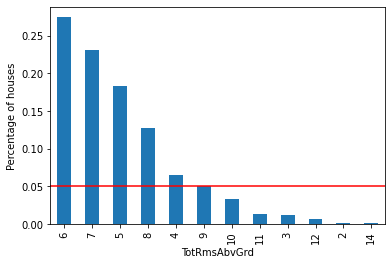

Variable: Fireplaces


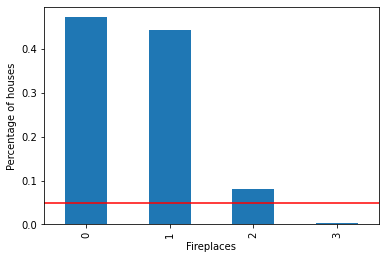

Variable: GarageCars


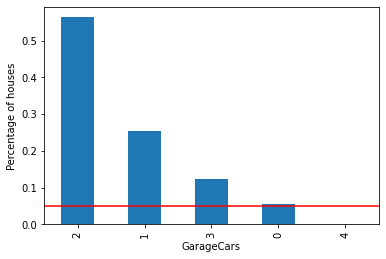

Variable: PoolArea


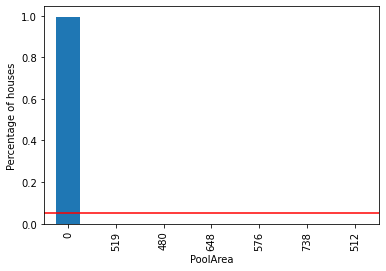

Variable: MoSold


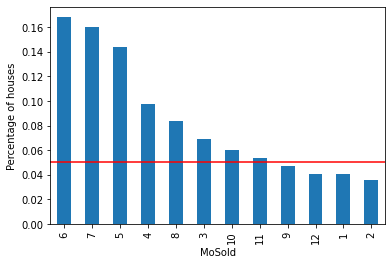

In [18]:
for var in categorical+ discrete:
    
    print('Variable:', var)
    temp_df = pd.Series(X_train[var].value_counts() / len(X_train) )

    # make plot with the above percentages
    fig = temp_df.sort_values(ascending=False).plot.bar()
    fig.set_xlabel(var)

    # add a line at 5 % to flag the threshold for rare categories
    fig.axhline(y=0.05, color='red')
    fig.set_ylabel('Percentage of houses')
    plt.show()

Presence of rare labels in all categorical and discrete variables


## Feature Engineering Pipeline

In [15]:
# I will treat discrete variables as if they were categorical
# to treat discrete as categorical using Feature-engine
# we need to re-cast them as object

X_train[discrete] = X_train[discrete].astype('O')
X_test[discrete] = X_test[discrete].astype('O')

In [20]:
X_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition
930,20,RL,73.0,8925,Pave,NaN,IR1,HLS,AllPub,Inside,...,0,0,0,NaN,NaN,NaN,0,7,WD,Normal
656,20,RL,72.0,10007,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,0,NaN,MnPrv,NaN,0,8,WD,Normal
45,120,RL,61.0,7658,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,0,NaN,NaN,NaN,0,2,WD,Normal
1348,20,RL,NaN,16196,Pave,NaN,IR3,Low,AllPub,Inside,...,0,0,0,NaN,NaN,NaN,0,8,WD,Normal
55,20,RL,100.0,10175,Pave,NaN,IR1,Lvl,AllPub,Inside,...,407,0,0,NaN,NaN,NaN,0,7,WD,Normal


In [21]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1314 entries, 930 to 684
Data columns (total 78 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1314 non-null   object 
 1   MSZoning       1314 non-null   object 
 2   LotFrontage    1081 non-null   float64
 3   LotArea        1314 non-null   int64  
 4   Street         1314 non-null   object 
 5   Alley          81 non-null     object 
 6   LotShape       1314 non-null   object 
 7   LandContour    1314 non-null   object 
 8   Utilities      1314 non-null   object 
 9   LotConfig      1314 non-null   object 
 10  LandSlope      1314 non-null   object 
 11  Neighborhood   1314 non-null   object 
 12  Condition1     1314 non-null   object 
 13  Condition2     1314 non-null   object 
 14  BldgType       1314 non-null   object 
 15  HouseStyle     1314 non-null   object 
 16  OverallQual    1314 non-null   object 
 17  OverallCond    1314 non-null   object 
 18  YearBui

In [16]:
house_pipe_1 = Pipeline([

    # missing data imputation - section 4
    ('missing_ind',
     mdi.AddMissingIndicator(
         variables=['LotFrontage', 'MasVnrArea', 'GarageYrBlt'])),

    ('imputer_num',
     mdi.MeanMedianImputer(
         imputation_method='median',
         variables=['LotFrontage', 'MasVnrArea', 'GarageYrBlt'])),

    ('imputer_cat', mdi.CategoricalImputer(variables=categorical)),


    # categorical encoding - section 6
    ('rare_label_enc',
     ce.RareLabelEncoder(tol=0.05, n_categories=1, variables=categorical + discrete)),

    # newly available categorical encoder, uses trees predictions
    ('categorical_enc',
     ce.DecisionTreeEncoder(random_state=2909, variables=categorical + discrete)),

    # discretisation - section 8
    ('discretisation',
     dsc.DecisionTreeDiscretiser(random_state=2909, variables=numerical)),

    # feature Scaling - section 10
    ('scaler', StandardScaler()),

    # regression
    ('lasso', Lasso(random_state=0))
])

In [17]:
# let's fit the pipeline
house_pipe_1.fit(X_train, y_train)

# let's get the predictions
X_train_preds = house_pipe_1.predict(X_train)
X_test_preds = house_pipe_1.predict(X_test)

In [18]:
# check model performance:

print('train mse: {}'.format(mean_squared_error(y_train, X_train_preds, squared=True)))
print('train rmse: {}'.format(mean_squared_error(y_train, X_train_preds, squared=False)))
print('train r2: {}'.format(r2_score(y_train, X_train_preds)))
print()
print('test mse: {}'.format(mean_squared_error(y_test, X_test_preds,squared=True)))
print('test rmse: {}'.format(mean_squared_error(y_test, X_test_preds, squared=False)))
print('test r2: {}'.format(r2_score(y_test, X_test_preds)))

train mse: 617124593.3557645
train rmse: 24841.992539966766
train r2: 0.9011625223813557

test mse: 1063016789.3316755
test rmse: 32603.938248801718
test r2: 0.8453144708738004


Text(0, 0.5, 'Predicted Price')

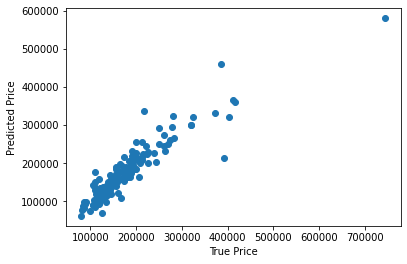

In [28]:
# plot predictions vs real value

plt.scatter(y_test,X_test_preds)
plt.xlabel('True Price')
plt.ylabel('Predicted Price')

<AxesSubplot:>

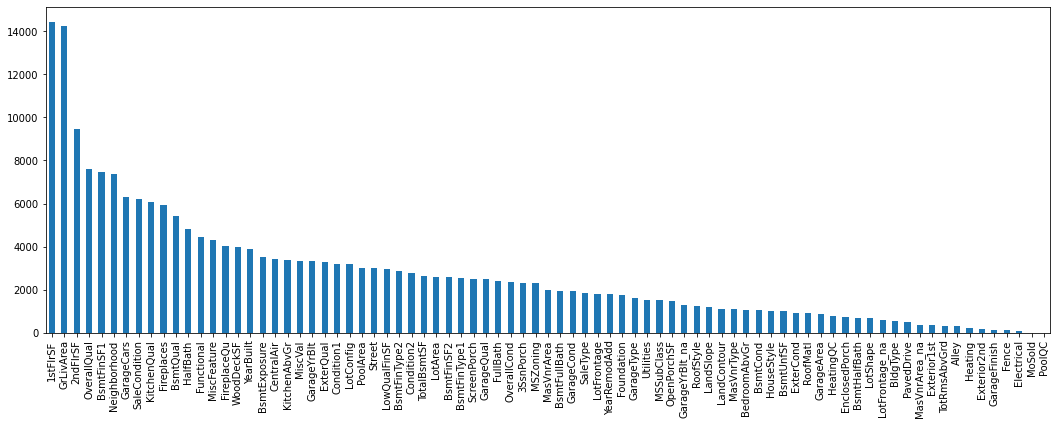

In [30]:
# let's explore the importance of the features
# the importance is given by the absolute value of the coefficient
# assigned by the Lasso

importance = pd.Series(np.abs(house_pipe_1.named_steps['lasso'].coef_))
importance.index = list(final_columns)+['LotFrontage_na', 'MasVnrArea_na',  'GarageYrBlt_na']
importance.sort_values(inplace=True, ascending=False)
importance.plot.bar(figsize=(18,6))

## My Feature Engineering Pipeline

In [19]:
# Identify categorical variables with mainly missing data
cat_high_na = [var for var in categorical if X_train[var].isnull().mean() > 0.3]

cat_high_na

['Alley', 'FireplaceQu', 'PoolQC', 'Fence', 'MiscFeature']

In [20]:
cat_low_na = [var for var in categorical if var not in cat_high_na]

In [21]:
house_pipe_2 = Pipeline([

    # missing data imputation - section 4
    ('missing_ind',
     mdi.AddMissingIndicator(
         variables=['LotFrontage', 'MasVnrArea', 'GarageYrBlt'])),

    ('imputer_num',
     mdi.MeanMedianImputer(
         imputation_method='median',
         variables=['LotFrontage', 'MasVnrArea', 'GarageYrBlt'])),
    
    # impute categorical variables with many missing data with 'missing' category
    ('imputer_cat_high_na', mdi.CategoricalImputer(variables=cat_high_na)),
    
    # impute categorical variables with less missing data with 'frequent' category
    ('imputer_cat_low_na', mdi.CategoricalImputer(imputation_method='frequent', variables=cat_low_na)),

    # categorical encoding - section 6
    ('rare_label_enc',
     ce.RareLabelEncoder(tol=0.05, n_categories=1, variables=categorical + discrete)),

    # newly available categorical encoder, uses trees predictions
    ('categorical_enc',
     ce.DecisionTreeEncoder(random_state=2909, variables=categorical + discrete)),

    # discretisation - section 8
    ('discretisation',
     dsc.DecisionTreeDiscretiser(random_state=2909, variables=numerical+ temporal)),

    # feature Scaling - section 10
    ('scaler', StandardScaler()),

    # regression
    ('lasso', Lasso(random_state=0))
])

In [22]:
# let's fit the pipeline
house_pipe_2.fit(X_train, y_train)

# let's get the predictions
X_train_preds = house_pipe_2.predict(X_train)
X_test_preds = house_pipe_2.predict(X_test)

In [23]:
# check model performance:

print('train mse: {}'.format(mean_squared_error(y_train, X_train_preds, squared=True)))
print('train rmse: {}'.format(mean_squared_error(y_train, X_train_preds, squared=False)))
print('train r2: {}'.format(r2_score(y_train, X_train_preds)))
print()
print('test mse: {}'.format(mean_squared_error(y_test, X_test_preds,squared=True)))
print('test rmse: {}'.format(mean_squared_error(y_test, X_test_preds, squared=False)))
print('test r2: {}'.format(r2_score(y_test, X_test_preds)))

train mse: 621133846.599203
train rmse: 24922.556983568178
train r2: 0.9005204081600426

test mse: 1027477997.9727336
test rmse: 32054.297652151632
test r2: 0.8504859195292066
